# EDA

 - Análise Exploratória dos Dados (Exploratory Data Analysis / EDA)
 - Ponto importante é nesse momento já termos claro o que queremos com nosso modelo, o que vamos querer fazer a previsão e entender a partir disso nossa variável.

## Objetivo do modelo

"Estime a probabilidade de um cliente responder a uma oferta" \
 "Além disso, espera-se uma análise critica que relacione os resultados obtidos ao comportamento dos grupos demográficos." \

_______

Esse foi o direcionamento que tivemos do problema, então teremos que prever a esse cliente responder a oferta da companhia, e dessa maneira temos que entender como está nossos dados e como devemos ter a target


## Bibliotecas
 - Centralizei um arquivo para ter todas as bibliotecas necessárias para a explorar um pouco nosso dados.

In [173]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Dados silver


In [164]:
nb_dir = Path.cwd().parent
data_diretorio = nb_dir / "data" / "silver"

data = pd.read_csv(data_diretorio/'dados_finais.csv')

## Exploratória da target -  _event_
 - Que temos ideia que será a direcionadora para nossa target, então vamos entender como ela está sendo distribuida

In [130]:
data['event'].value_counts()

event
offer received     76668
offer viewed       58058
offer completed    39691
Name: count, dtype: int64

#### Conclusão - Exploração da target

Podemos observar que nosso interesse está ligado ao cliente responder a uma oferta, então com base na exploração dos nosso eventos, vamos considerar a sua resposta a oferta a casos que tem a oferta completada. \
E com isso aplicamos o filtro na base e teremos apenas esses dados de oferta completada.

In [171]:
data = data[data['event']=='offer completed']

In [172]:
data[data['person']=='9fa9ae8f57894cc9a3b8a9bbe0fc1b2f']

,person,event,time,amount,offer_id,reward,gender,age,became_member_on,income,reward_offer,difficulty,duration,offer_type,email,mobile,social,web
12656,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,34.56,2906b810c7d4411798c6938adc9daaa5,2.0,M,42,2016-01-17,96000.0,2.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
74773,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,354,18.42,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,M,42,2016-01-17,96000.0,3.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
110135,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,474,21.13,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,M,42,2016-01-17,96000.0,5.0,20.0,10.0,discount,1.0,0.0,0.0,1.0
136494,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,540,24.30,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,M,42,2016-01-17,96000.0,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0


## Exploratória dos nossos dados



## Transformações dos dados (colocar dentro da pipeline)

In [ ]:
df_encoded = pd.get_dummies(data, columns=['event','offer_type'],dtype=int)
data['gender'] = data['gender'].map({'female': 0, 'male': 1})
df_profile_clean['age'] = df_profile_clean['age'].replace(118, np.nan)
df_transcript_clean['time_days'] = (df_transcript_clean['time'] / 24).astype(float)

In [ ]:
dados_transacao_agrupado = (
    data
    .groupby(['person', 'offer_id'])['event']
    .unique()
    .reset_index()
)

## Rascunho

In [ ]:
#verificando valores ausentes:
master.isna().mean().sort_values(ascending=False)
# Conclusão: valores ausentes concentram-se em 'amount' (~55%, esperado pois só transações têm valor)
# e em variáveis de oferta (~45%, esperado pois transações não estão ligadas a ofertas).
# Ausência em 'gender', 'age' e 'income' (~11%) é natural, pois alguns clientes não informam.
# Não há ausentes em colunas-chave como 'time', 'person' e 'event'. Estrutura consistente.


amount              0.546696
offer_id            0.453304
reward              0.453304
channels            0.453304
difficulty          0.453304
duration            0.453304
offer_type          0.453304
gender              0.110174
age                 0.110174
income              0.110174
person              0.000000
event               0.000000
time                0.000000
time_days           0.000000
became_member_on    0.000000
dtype: float64

In [ ]:
#checando as idades inválidas
master['age'].describe()
# Conclusão: idades variam entre 18 e 101, sem valores artificiais (118 foi removido).
# Distribuição faz sentido: média ~54 anos. Dados de idade agora estão prontos para análise.

count    272762.000000
mean         53.840696
std          17.551337
min          18.000000
25%          41.000000
50%          55.000000
75%          66.000000
max         101.000000
Name: age, dtype: float64

Contagem de eventos:
event
transaction        138953
offer_received      76277
offer_viewed        57725
offer_completed     33579
Name: count, dtype: int64

Proporção dos eventos (%):
event
transaction        45.33
offer_received     24.88
offer_viewed       18.83
offer_completed    10.95
Name: proportion, dtype: float64


C:\Users\edude\AppData\Local\Temp\ipykernel_21000\2816355007.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette="viridis")


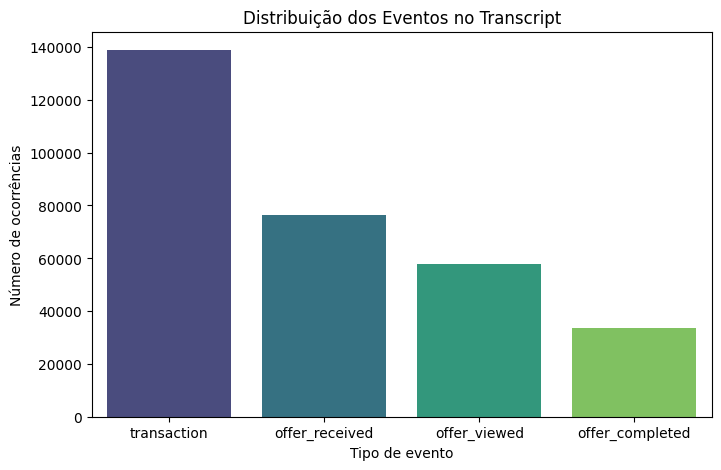

In [ ]:


# ============================================================
# ANÁLISE DESCRITIVA 1: DISTRIBUIÇÃO DOS EVENTOS
# ------------------------------------------------------------
# Objetivo:
# - Contar quantos eventos de cada tipo ocorreram no dataset
#   (offer_received, offer_viewed, offer_completed, transaction).
# - Calcular a proporção (%) de cada evento em relação ao total.
# - Visualizar essas informações em um gráfico de barras.
# Isso nos ajuda a entender:
#   • Qual tipo de evento é mais frequente.
#   • A importância relativa de transações vs interações com ofertas.
# ============================================================

# Contagem de eventos
event_counts = master['event'].value_counts()
event_props = master['event'].value_counts(normalize=True) * 100

print("Contagem de eventos:")
print(event_counts)
print("\nProporção dos eventos (%):")
print(event_props.round(2))

# Gráfico de barras (quantidade absoluta)
plt.figure(figsize=(8,5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette="viridis")
plt.title("Distribuição dos Eventos no Transcript")
plt.xlabel("Tipo de evento")
plt.ylabel("Número de ocorrências")
plt.show()


### Conclusão — Distribuição dos Eventos

Podemos observar que:

- **Transações** representam a maior parte dos eventos, ultrapassando 130 mil ocorrências.  
  Isso mostra que a base é fortemente composta por registros de gastos dos clientes.

- **Ofertas recebidas** aparecem em segundo lugar (~75 mil eventos), indicando quantas vezes os clientes foram expostos às campanhas.

- **Ofertas visualizadas** (~58 mil) são menos frequentes do que as recebidas, o que sugere que **nem todos os clientes interagem com as ofertas** que recebem.

- **Ofertas completadas** (~34 mil) são ainda menos frequentes, o que é esperado, pois nem todas as ofertas recebidas ou visualizadas resultam em conversão.

**Interpretação inicial:**  
A sequência natural de eventos é respeitada (receber → visualizar → completar), e as contagens diminuem a cada etapa, o que faz sentido. Além disso, as transações (que podem ocorrer com ou sem ofertas) são o evento mais comum, refletindo o comportamento real dos clientes no programa.


C:\Users\edude\AppData\Local\Temp\ipykernel_21000\1659165409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_profile_clean, palette="Set2")


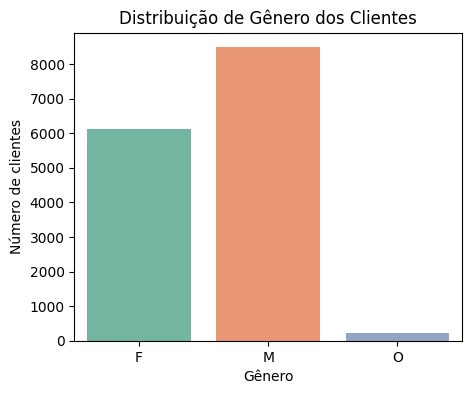

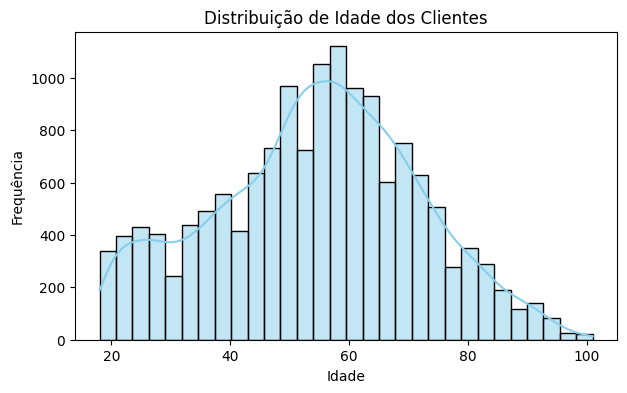

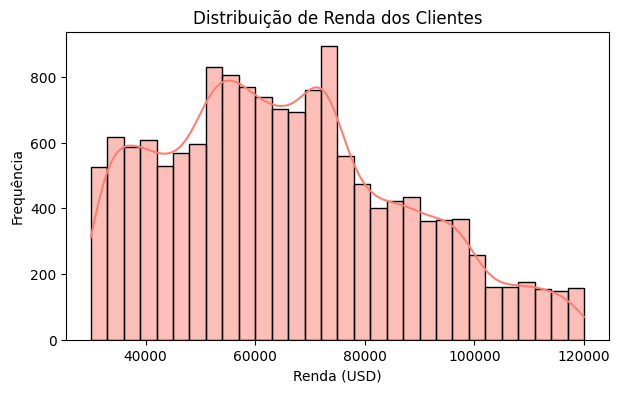

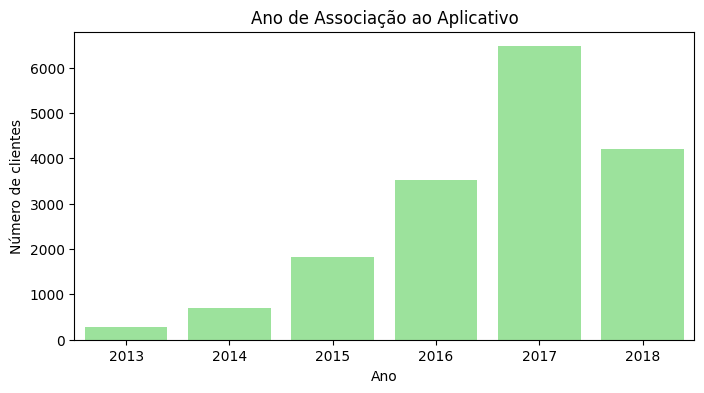

In [ ]:
# ============================================================
# ANÁLISE DESCRITIVA 2: PERFIL DOS CLIENTES
# ------------------------------------------------------------
# Objetivo:
# - Explorar as variáveis demográficas do dataset de clientes:
#   • Distribuição de gênero
#   • Distribuição de idades
#   • Distribuição de renda
#   • Tempo de associação ao app (data de entrada)
# Isso ajuda a entender melhor quem são os clientes e
# possíveis diferenças entre perfis.
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Distribuição de gênero ----------
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df_profile_clean, palette="Set2")
plt.title("Distribuição de Gênero dos Clientes")
plt.xlabel("Gênero")
plt.ylabel("Número de clientes")
plt.show()

# ---------- Distribuição de idades ----------
plt.figure(figsize=(7,4))
sns.histplot(df_profile_clean['age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribuição de Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# ---------- Distribuição de renda ----------
plt.figure(figsize=(7,4))
sns.histplot(df_profile_clean['income'].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribuição de Renda dos Clientes")
plt.xlabel("Renda (USD)")
plt.ylabel("Frequência")
plt.show()

# ---------- Tempo de associação ----------
# Criar colunas auxiliares de ano e mês
df_profile_clean['year_member'] = df_profile_clean['became_member_on'].dt.year
df_profile_clean['month_member'] = df_profile_clean['became_member_on'].dt.to_period("M")

plt.figure(figsize=(8,4))
sns.countplot(x='year_member', data=df_profile_clean, color="lightgreen")
plt.title("Ano de Associação ao Aplicativo")
plt.xlabel("Ano")
plt.ylabel("Número de clientes")
plt.show()


### Conclusões — Perfil dos Clientes

### Distribuição de Gênero
- A maioria dos clientes é do gênero **masculino (M)**, seguido de **feminino (F)**.  
- O gênero **outros (O)** aparece em quantidade bastante reduzida.  
- Esse padrão sugere que os clientes do aplicativo da Starbucks têm predominância masculina,
mas ainda há uma base relevante de mulheres.

### Distribuição de Idade
- A idade dos clientes varia de aproximadamente **18 a 100 anos**.  
- A distribuição se concentra entre **40 e 70 anos**, com pico em torno de **55 anos**.  
- Poucos clientes têm idade muito baixa ou muito alta, e a distribuição lembra um formato quase normal.  
- Isso indica que o público do app é, em grande parte, **adulto de meia-idade**.

### Distribuição de Renda
- A renda dos clientes vai de aproximadamente **30.000 a 120.000 dólares por ano**.  
- A maioria se concentra entre **40.000 e 80.000 dólares**.  
- Existe uma cauda à direita (clientes com renda mais alta), mas eles são minoria.  
- Isso sugere que o público da Starbucks está em uma **faixa de renda média a média-alta**.

### Ano de Associação ao Aplicativo
- O número de clientes cresceu ao longo do tempo, com destaque para o aumento entre **2015 e 2017**.  
- O ano de **2017 foi o pico de novos cadastros**.  
- Em 2018, o número caiu, mas ainda se manteve relativamente alto.  
- Isso pode estar relacionado a estratégias de marketing e expansão do programa de fidelidade nesse período.


Tipos de oferta - contagem:
offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

Tipos de oferta - proporção (%):
offer_type
bogo             40.0
discount         40.0
informational    20.0
Name: proportion, dtype: float64


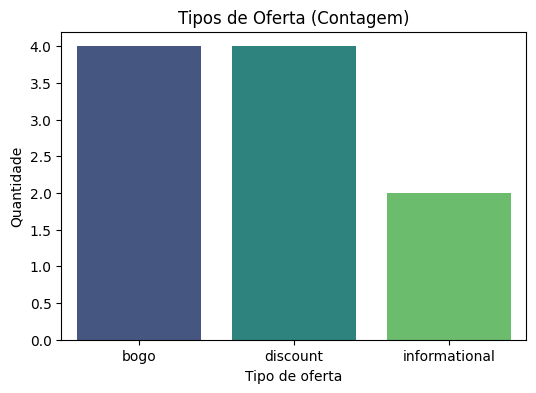


Resumo geral de duration / reward / difficulty:


,duration,reward,difficulty
count,10.00,10.00,10.00
mean,6.50,4.20,7.70
std,2.32,3.58,5.83
min,3.00,0.00,0.00
25%,5.00,2.00,5.00
50%,7.00,4.00,8.50
75%,7.00,5.00,10.00
max,10.00,10.00,20.00



Duração (dias) por tipo de oferta:


,count,mean,median,min,max
offer_type,,,,,
bogo,4,6.0,6.0,5,7
discount,4,8.5,8.5,7,10
informational,2,3.5,3.5,3,4


C:\Users\edude\AppData\Local\Temp\ipykernel_21000\1772090423.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='offer_type', y='duration', data=df_portfolio_clean, palette="Set3")


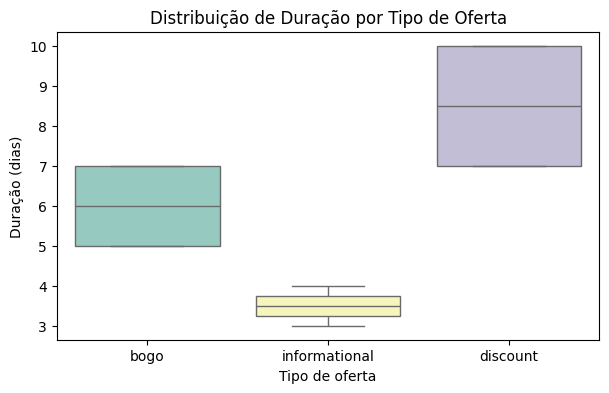

Canais - contagem:
channels
email     10
mobile     9
web        8
social     6
Name: count, dtype: int64

Canais - proporção (%):
channels
email     30.30
mobile    27.27
web       24.24
social    18.18
Name: proportion, dtype: float64


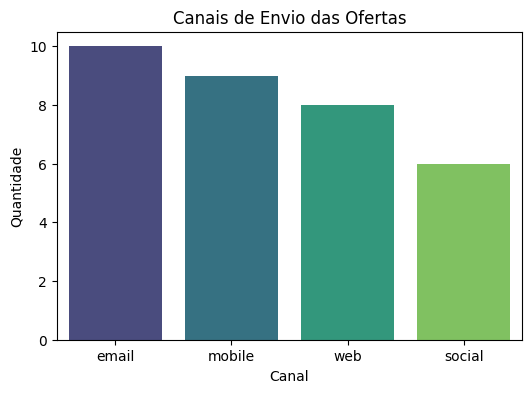


Tabela tipo × canal (quantidade de ofertas que usam cada canal):


channels,email,mobile,social,web
offer_type,,,,
bogo,4,4,3,3
discount,4,3,2,4
informational,2,2,1,1


In [ ]:
# ============================================================
# ANÁLISE DESCRITIVA 3: METADADOS DAS OFERTAS (portfolio)
# ------------------------------------------------------------
# Objetivo:
# - Quantificar os tipos de oferta (bogo, discount, informational)
#   e suas proporções no portfólio.
# - Investigar duração (dias), reward e difficulty, inclusive por tipo.
# - Explorar os canais de envio (web, email, mobile, social)
#   e o cruzamento tipo × canal.
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------- 3.1 Tipos de oferta ----------
type_counts = df_portfolio_clean['offer_type'].value_counts()
type_props  = df_portfolio_clean['offer_type'].value_counts(normalize=True)*100

print("Tipos de oferta - contagem:")
print(type_counts)
print("\nTipos de oferta - proporção (%):")
print(type_props.round(2))

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette="viridis", legend=False)
plt.title("Tipos de Oferta (Contagem)")
plt.xlabel("Tipo de oferta")
plt.ylabel("Quantidade")
plt.show()

# ---------- 3.2 Duração / Reward / Difficulty ----------
print("\nResumo geral de duration / reward / difficulty:")
display(df_portfolio_clean[['duration','reward','difficulty']].describe().round(2))

# duração por tipo
dur_by_type = (df_portfolio_clean
               .groupby('offer_type')['duration']
               .agg(['count','mean','median','min','max'])
               .round(2))
print("\nDuração (dias) por tipo de oferta:")
display(dur_by_type)

plt.figure(figsize=(7,4))
sns.boxplot(x='offer_type', y='duration', data=df_portfolio_clean, palette="Set3")
plt.title("Distribuição de Duração por Tipo de Oferta")
plt.xlabel("Tipo de oferta")
plt.ylabel("Duração (dias)")
plt.show()

# ---------- 3.3 Canais ----------
# Contagem simples de canais (usando a versão explodida)
channel_counts = df_portfolio_channels['channels'].value_counts()
channel_props  = df_portfolio_channels['channels'].value_counts(normalize=True)*100

print("Canais - contagem:")
print(channel_counts)
print("\nCanais - proporção (%):")
print(channel_props.round(2))

plt.figure(figsize=(6,4))
sns.barplot(x=channel_counts.index, y=channel_counts.values, hue=channel_counts.index, palette="viridis", legend=False)
plt.title("Canais de Envio das Ofertas")
plt.xlabel("Canal")
plt.ylabel("Quantidade")
plt.show()

# Cruzamento tipo × canal (quantas ofertas de cada tipo usam cada canal)
type_channel = (df_portfolio_channels
                .pivot_table(index='offer_type', columns='channels', aggfunc='size', fill_value=0))
print("\nTabela tipo × canal (quantidade de ofertas que usam cada canal):")
display(type_channel)


### Conclusões — Metadados das Ofertas

### Tipos de Oferta
- O portfólio é composto por **40% de ofertas BOGO**, **40% de ofertas Discount** e **20% de ofertas Informational**.  
- Isso mostra que a Starbucks investe majoritariamente em **ofertas transacionais** (que exigem gasto mínimo e oferecem recompensa), enquanto as informacionais aparecem em menor proporção.

### Duração, Recompensa e Dificuldade
- A duração das ofertas varia de **3 a 10 dias**, com média de **6,5 dias**.  
- Por tipo:  
  • **BOGO** → duração média de 6 dias.  
  • **Discount** → duração média de 8,5 dias (mais longas).  
  • **Informational** → duração média de 3,5 dias (mais curtas).  
- **Reward** varia entre 0 e 10 dólares, com média de ~4,2.  
- **Difficulty** varia entre 0 e 20 dólares, média ~7,7.  
- Como esperado, **ofertas informacionais** aparecem com `difficulty = 0` e `reward = 0`, já que não exigem gasto mínimo e não oferecem recompensa financeira.

### Canais de Envio
- Os canais mais comuns foram:  
  • **Email (30,3%)**  
  • **Mobile (27,3%)**  
  • **Web (24,2%)**  
  • **Social (18,2%)**  
- Isso indica que **email e mobile são os principais meios de contato**, mas há uma distribuição relativamente equilibrada entre canais.

### Cruzamento Tipo × Canal
- As ofertas **BOGO** usam amplamente todos os canais (email, mobile, social, web).  
- As ofertas **Discount** também são multicanal, mas aparecem um pouco menos em social.  
- As ofertas **Informational** estão presentes em todos os canais, mas em menor quantidade.  

**Resumo:**  
O portfólio da Starbucks combina **principalmente ofertas transacionais (BOGO e Discount)**, de curta duração (3 a 10 dias) e distribuídas por múltiplos canais. Já as **ofertas Informational** são minoria, têm duração mais curta e não exigem gasto/recompensa, funcionando como uma estratégia de comunicação com o cliente.


Gasto total (toda a base de transações): $1,775,451.97
Gasto médio por transação: $12.78
Gasto médio por cliente (somando transações do cliente): $107.10


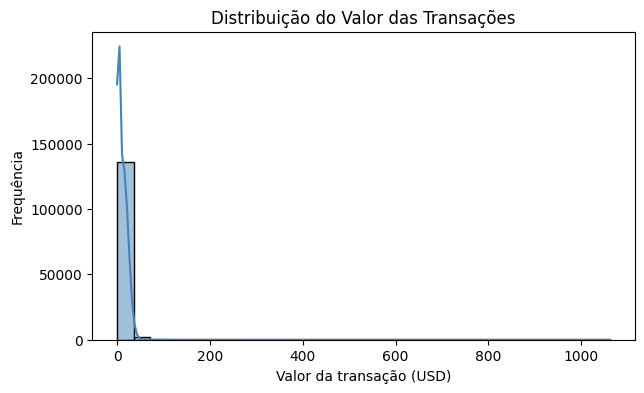


Gastos por gênero:


,total,media,mediana,n
gender,,,,
F,863695.00,17.490077,15.00,49382
M,844890.86,11.606600,7.05,72794
O,26356.54,14.798731,13.30,1781


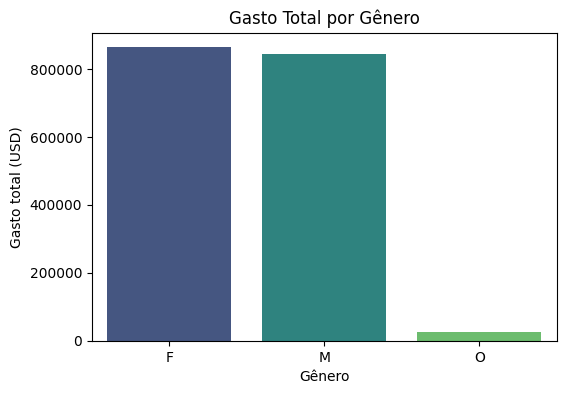


Gastos por faixa de idade:


C:\Users\edude\AppData\Local\Temp\ipykernel_21000\1911388049.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gasto_por_idade = (tx.groupby('faixa_idade')['amount']


,total,media,mediana,n
faixa_idade,,,,
18–29,132319.82,8.154300,4.770,16227
30–39,154366.96,10.055169,6.360,15352
40–49,247435.20,12.872500,10.475,19222
50–59,452260.21,16.390396,14.190,27593
60–69,378699.23,16.171979,13.500,23417
70–79,222834.61,16.453859,14.150,13543
80+,147026.37,17.090128,14.330,8603


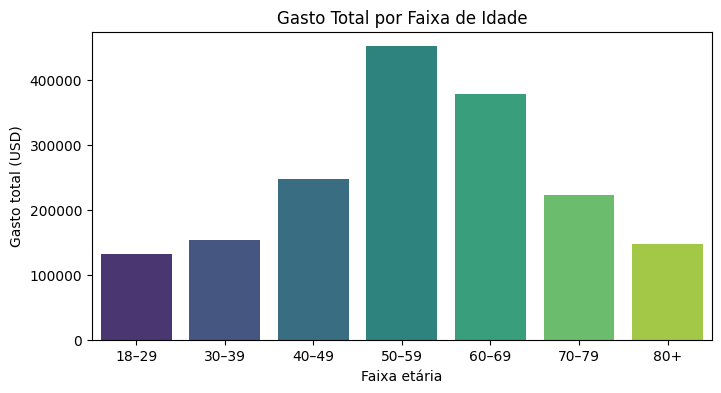


Gastos por faixa de renda:


C:\Users\edude\AppData\Local\Temp\ipykernel_21000\1911388049.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gasto_por_renda = (tx.groupby('faixa_renda')['amount']


,total,media,mediana,n
faixa_renda,,,,
<40k,121971.85,6.174539,4.30,19754
40–60k,382759.68,9.098595,6.68,42068
60–80k,572988.61,14.772697,13.51,38787
80–100k,451739.93,27.056776,22.98,16696
100k+,205482.33,30.890308,26.55,6652


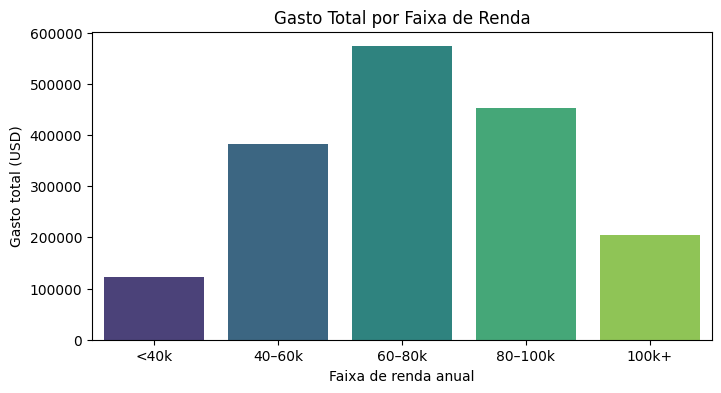


Comparação: transações com oferta vs sem oferta


,total,media,mediana,n
tem_oferta,,,,
sem_oferta,1775451.97,12.777356,8.89,138953


C:\Users\edude\AppData\Local\Temp\ipykernel_21000\1911388049.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tx, x='tem_oferta', y='amount', palette="Set2")


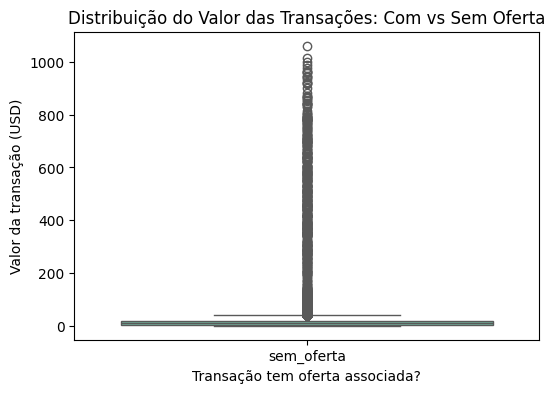


Gasto médio por cliente (somatório do cliente) — com vs sem oferta:


tem_oferta
sem_oferta    107.096874
Name: gasto_médio_por_cliente, dtype: float64

In [ ]:
# ============================================================
# ANÁLISE DESCRITIVA 4: TRANSÇÕES (GASTOS DOS CLIENTES)
# ------------------------------------------------------------
# Objetivo:
# - Resumir gastos totais/médios.
# - Comparar gastos por gênero, faixa etária e faixa de renda.
# - Separar transações COM oferta associada vs SEM oferta.
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- 4.0 Filtrar somente transações ----------
tx = master.query("event == 'transaction'").copy()

# Sanidade: remover amounts não positivos (se existirem casos anômalos)
tx = tx[tx['amount'].notna() & (tx['amount'] >= 0)]

# ---------- 4.1 Gastos totais e médios ----------
tot_gasto   = tx['amount'].sum()
med_gasto   = tx['amount'].mean()
med_cliente = tx.groupby('person')['amount'].sum().mean()  # gasto médio por cliente (agregado)
print(f"Gasto total (toda a base de transações): ${tot_gasto:,.2f}")
print(f"Gasto médio por transação: ${med_gasto:,.2f}")
print(f"Gasto médio por cliente (somando transações do cliente): ${med_cliente:,.2f}")

plt.figure(figsize=(7,4))
sns.histplot(tx['amount'], bins=30, kde=True, color="steelblue")
plt.title("Distribuição do Valor das Transações")
plt.xlabel("Valor da transação (USD)")
plt.ylabel("Frequência")
plt.show()

# ---------- 4.2 Gastos por gênero ----------
gasto_por_genero = (tx.groupby('gender')['amount']
                      .agg(total='sum', media='mean', mediana='median', n='count')
                      .sort_values('total', ascending=False))
print("\nGastos por gênero:")
display(gasto_por_genero)

plt.figure(figsize=(6,4))
sns.barplot(x=gasto_por_genero.index, y=gasto_por_genero['total'].values,
            hue=gasto_por_genero.index, palette="viridis", legend=False)
plt.title("Gasto Total por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Gasto total (USD)")
plt.show()

# ---------- 4.3 Gastos por FAIXAS DE IDADE ----------
# criar faixas (ajuste se preferir outras quebras)
bins_idade = [18, 30, 40, 50, 60, 70, 80, 110]
labels_idade = ["18–29","30–39","40–49","50–59","60–69","70–79","80+"]
tx['faixa_idade'] = pd.cut(tx['age'], bins=bins_idade, labels=labels_idade, right=False)

gasto_por_idade = (tx.groupby('faixa_idade')['amount']
                     .agg(total='sum', media='mean', mediana='median', n='count'))
print("\nGastos por faixa de idade:")
display(gasto_por_idade)

plt.figure(figsize=(8,4))
sns.barplot(x=gasto_por_idade.index, y=gasto_por_idade['total'].values,
            hue=gasto_por_idade.index, palette="viridis", legend=False)
plt.title("Gasto Total por Faixa de Idade")
plt.xlabel("Faixa etária")
plt.ylabel("Gasto total (USD)")
plt.show()

# ---------- 4.4 Gastos por FAIXAS DE RENDA ----------
bins_renda = [0, 40000, 60000, 80000, 100000, 200000]
labels_renda = ["<40k","40–60k","60–80k","80–100k","100k+"]
tx['faixa_renda'] = pd.cut(tx['income'], bins=bins_renda, labels=labels_renda, right=False)

gasto_por_renda = (tx.groupby('faixa_renda')['amount']
                     .agg(total='sum', media='mean', mediana='median', n='count'))
print("\nGastos por faixa de renda:")
display(gasto_por_renda)

plt.figure(figsize=(8,4))
sns.barplot(x=gasto_por_renda.index, y=gasto_por_renda['total'].values,
            hue=gasto_por_renda.index, palette="viridis", legend=False)
plt.title("Gasto Total por Faixa de Renda")
plt.xlabel("Faixa de renda anual")
plt.ylabel("Gasto total (USD)")
plt.show()

# ---------- 4.5 Transações COM oferta vs SEM oferta ----------
# Se a transação tem offer_id -> associada a alguma oferta ativa
tx['tem_oferta'] = np.where(tx['offer_id'].notna(), 'com_oferta', 'sem_oferta')

comp_oferta = (tx.groupby('tem_oferta')['amount']
                 .agg(total='sum', media='mean', mediana='median', n='count'))
print("\nComparação: transações com oferta vs sem oferta")
display(comp_oferta)

plt.figure(figsize=(6,4))
sns.boxplot(data=tx, x='tem_oferta', y='amount', palette="Set2")
plt.title("Distribuição do Valor das Transações: Com vs Sem Oferta")
plt.xlabel("Transação tem oferta associada?")
plt.ylabel("Valor da transação (USD)")
plt.show()

# (Opcional) Média por cliente em cada grupo:
comp_cliente = (tx.groupby(['tem_oferta','person'])['amount'].sum()
                  .groupby('tem_oferta').mean().rename('gasto_médio_por_cliente'))
print("\nGasto médio por cliente (somatório do cliente) — com vs sem oferta:")
display(comp_cliente)


<!-- #### Análise Descritiva — Transações e Gastos

### 1. Distribuição do Valor das Transações
- **Gasto total** em toda a base: **~$1,78 milhão**.  
- **Gasto médio por transação:** **~$12,78**.  
- **Gasto médio por cliente (soma das transações de cada um):** **~$107,10**.  

O histograma mostra que a maior parte das transações se concentra em valores baixos (até ~\$20). Há poucas transações com valores muito altos (outliers acima de \$100, chegando a >\$1000), o que distorce a escala do gráfico e “esprem e” a distribuição na faixa baixa.

> **Por que o gráfico pode parecer “estranho”**  
> A presença de poucos valores extremamente altos cria uma **cauda longa** (distribuição assimétrica).  
> Isso faz a maior parte dos dados (valores baixos) ficar comprimida num pequeno intervalo do eixo X.

---

### 2. Gastos por Gênero
- **Mulheres (F):** maior **gasto total** (~\$864 mil) e **média por transação** (~\$17,5).  
- **Homens (M):** gasto total próximo (~\$845 mil), porém **média por transação** menor (~\$11,6).  
- **Outro (O):** participação pequena (~\$26 mil), com média intermediária (~\$14,8).

**Interpretação:** mulheres gastaram **mais por transação e no total**, mesmo com menos registros que homens.

---

### 3. Gastos por Faixa de Renda
- Maior **gasto total** na faixa **\$60k–\$80k** (~\$573 mil).  
- **Média por transação** cresce com a renda:  
  faixas **\$80–100k** e **\$100k+** têm médias > \$27 e > \$30, respectivamente.  
- **\<\$40k**: menor gasto total (~\$122 mil) e **média** (~\$6).

**Conclusão:** renda maior → **maior tíquete médio**; mas o **maior volume** de clientes está entre **\$40k–\$80k**, explicando o pico de gasto total nessas faixas.

---

### 4. Gastos por Faixa de Idade
- Pico de **gasto total** em **50–59 anos** (~\$452 mil) e **60–69 anos** (~\$379 mil).  
- **18–29**: menor contribuição (~\$132 mil) e menor média (~\$8).  
- Faixas **70+** ainda relevantes, mas abaixo do pico de 50–59.

**Interpretação:** **meia-idade (40–69)** concentra maior poder de consumo.

---

### 5. Transações com vs. sem Oferta
- Todas as transações aparecem como **“sem oferta”** (campo `offer_id` vazio para eventos de transação).  
- O boxplot tem **apenas uma categoria**, então a comparação não é informativa.

> **Por que o boxplot pode parecer “estranho”**  
> (1) Só existe a categoria **“sem oferta”**, então não há contraste.  
> (2) **Outliers muito altos** alongam o eixo Y e achatam a parte principal da distribuição.

---

##  Resumo Geral
- As transações são **concentradas em valores baixos**, com alguns **outliers** altos.  
- **Mulheres** gastam mais em média do que **homens**.  
- **Renda maior** → **tíquete médio maior**; gasto total cresce onde há **mais clientes** (faixas intermediárias).  
- **Meia-idade (50–69)** concentra o maior gasto total.   -->
- A comparação **com vs. sem oferta** não se aplica aqui, pois as transações não estão vinculadas a `offer_id`.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# ============================================================
# 1) Preparar variável-alvo (exemplo: se cliente completou uma oferta)
# ------------------------------------------------------------
# Vamos criar uma variável binária: 1 se houve pelo menos um "offer_completed",
# 0 caso contrário.
clientes_completaram = master.groupby("person")['event'].apply(
    lambda x: int('offer_completed' in x.values)
).reset_index().rename(columns={'event':'completed_offer'})

# Junta essa informação com perfil (onde está o 'income')
df_model = clientes_completaram.merge(df_profile_clean, left_on="person", right_on="id", how="left")

# ============================================================
# 2) Duas versões do dataset
# ------------------------------------------------------------
# a) Versão sem imputação (descarta missing em income)
df_sem_imputacao = df_model.dropna(subset=['income']).copy()

# b) Versão com imputação (substitui missing em income pela mediana)
df_com_imputacao = df_model.copy()
mediana_income = df_com_imputacao['income'].median()
df_com_imputacao['income'] = df_com_imputacao['income'].fillna(mediana_income)

# ============================================================
# 3) Definir X (features) e y (target)
# ------------------------------------------------------------
features = ['age', 'income']   # podemos usar outras, mas income é o foco
target = 'completed_offer'

X1, y1 = df_sem_imputacao[features], df_sem_imputacao[target]
X2, y2 = df_com_imputacao[features], df_com_imputacao[target]

# ============================================================
# 4) Classificador e Validação Cruzada
# ------------------------------------------------------------
clf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Sem imputação
scores_sem = cross_val_score(clf, X1, y1, cv=cv, scoring='accuracy')

# Com imputação
scores_com = cross_val_score(clf, X2, y2, cv=cv, scoring='accuracy')

# ============================================================
# 5) Resultados
# ------------------------------------------------------------
print("Validação Cruzada (sem imputação):")
print("Acurácias:", scores_sem)
print("Média:", scores_sem.mean())

print("\nValidação Cruzada (com imputação pela mediana):")
print("Acurácias:", scores_com)
print("Média:", scores_com.mean())


Validação Cruzada (sem imputação):
Acurácias: [0.75143339 0.75177066 0.75379427 0.753457   0.75143339]
Média: 0.7523777403035413

Validação Cruzada (com imputação pela mediana):
Acurácias: [0.74911765 0.73794118 0.73470588 0.74029412 0.73764706]
Média: 0.7399411764705882


<!-- # Validação Cruzada — Imputação de Renda (income)

## O que foi feito

1) **Definimos a variável-alvo (target)**  
   - Para cada cliente (`person`), marcamos `1` se ele **completou ao menos uma oferta** (`offer_completed`) e `0` caso contrário.  
   - Isso transforma o problema em **classificação binária** (completou vs. não completou).

2) **Juntamos o alvo com o perfil do cliente**  
   - Cruzamos com `df_profile_clean` para ter as features **`age`** e **`income`** (renda).

3) **Criamos duas versões do dataset** para testar o *tratamento de valores ausentes*:
   - **Sem imputação**: removemos linhas onde `income` era nulo (`NaN`).  
   - **Com imputação**: preenchemos `income` faltante com a **mediana** da renda.

4) **Treinamos e avaliamos um modelo igual nos dois cenários**  
   - Modelo: **RandomForestClassifier** (padrão, `random_state=42`).  
   - Validação: **5-fold Stratified Cross-Validation** (mantém a proporção de classes em cada dobra).  
   - Métrica: **accuracy** (acertos/total) em cada dobra; depois calculamos a **média**.

---

## Resultados

- **Sem imputação (descartando NaN)**  
  Acurácias por dobra: `[0.7514, 0.7518, 0.7538, 0.7535, 0.7514]`  
  **Média:** **0.7524**

- **Com imputação (mediana)**  
  Acurácias por dobra: `[0.7491, 0.7379, 0.7347, 0.7403, 0.7376]`  
  **Média:** **0.7399**

---

- A **validação cruzada** estima o desempenho **fora da amostra** (generalização) e reduz o risco de avaliar o modelo apenas em um único “corte” dos dados.
- O modelo **sem imputação** teve **accuracy médio ~1,25 p.p. maior** (*0,7524 vs 0,7399*).  
- Como o **modelo** e a **validação** foram idênticos nos dois cenários, a diferença se deve ao **tratamento de valores ausentes em `income`**.

---

## Conclusão 

- **Para este alvo e esse conjunto de features**, **descartar** as linhas sem `income` rendeu melhor desempenho do que **imputar por mediana**.  
- Possíveis razões:
  - As ausências de `income` **não são aleatórias** (o que a mediana não captura), introduzindo ruído.  
  - Preencher com um valor “típico” (mediana) **achata diferenças** entre clientes e reduz o sinal preditivo.

**Decisão prática:** para esta tarefa, **manter a versão sem imputação de `income`** foi **ligeiramente melhor**.  
(Anote no relatório que você testou os dois tratamentos e comparou com validação cruzada.)

--- -->

